# Load Model and Test

#### Packages

In [214]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
from matplotlib.pyplot import figure
import joblib

## To run with your own data, replace "trainDataXGBoost.csv" with your dataset's file name

#### Note: Must be in ".csv" format

#### Load Dataset

In [215]:
# Make dataframe from data
df = pd.read_csv("finalTestData.csv")
# Make sure everything in dataframe is numeric (get rid of $)
df = df.apply(pd.to_numeric, errors='coerce')

#### Split predictors and response

In [216]:
y_df = df.iloc[:, 0]
X_df = df.iloc[:, 1:]

#### Load Model

In [217]:
# Load the model from the file
loadedModel = joblib.load('xgboostModelv2.pkl')

#### Plot weights of coefficients

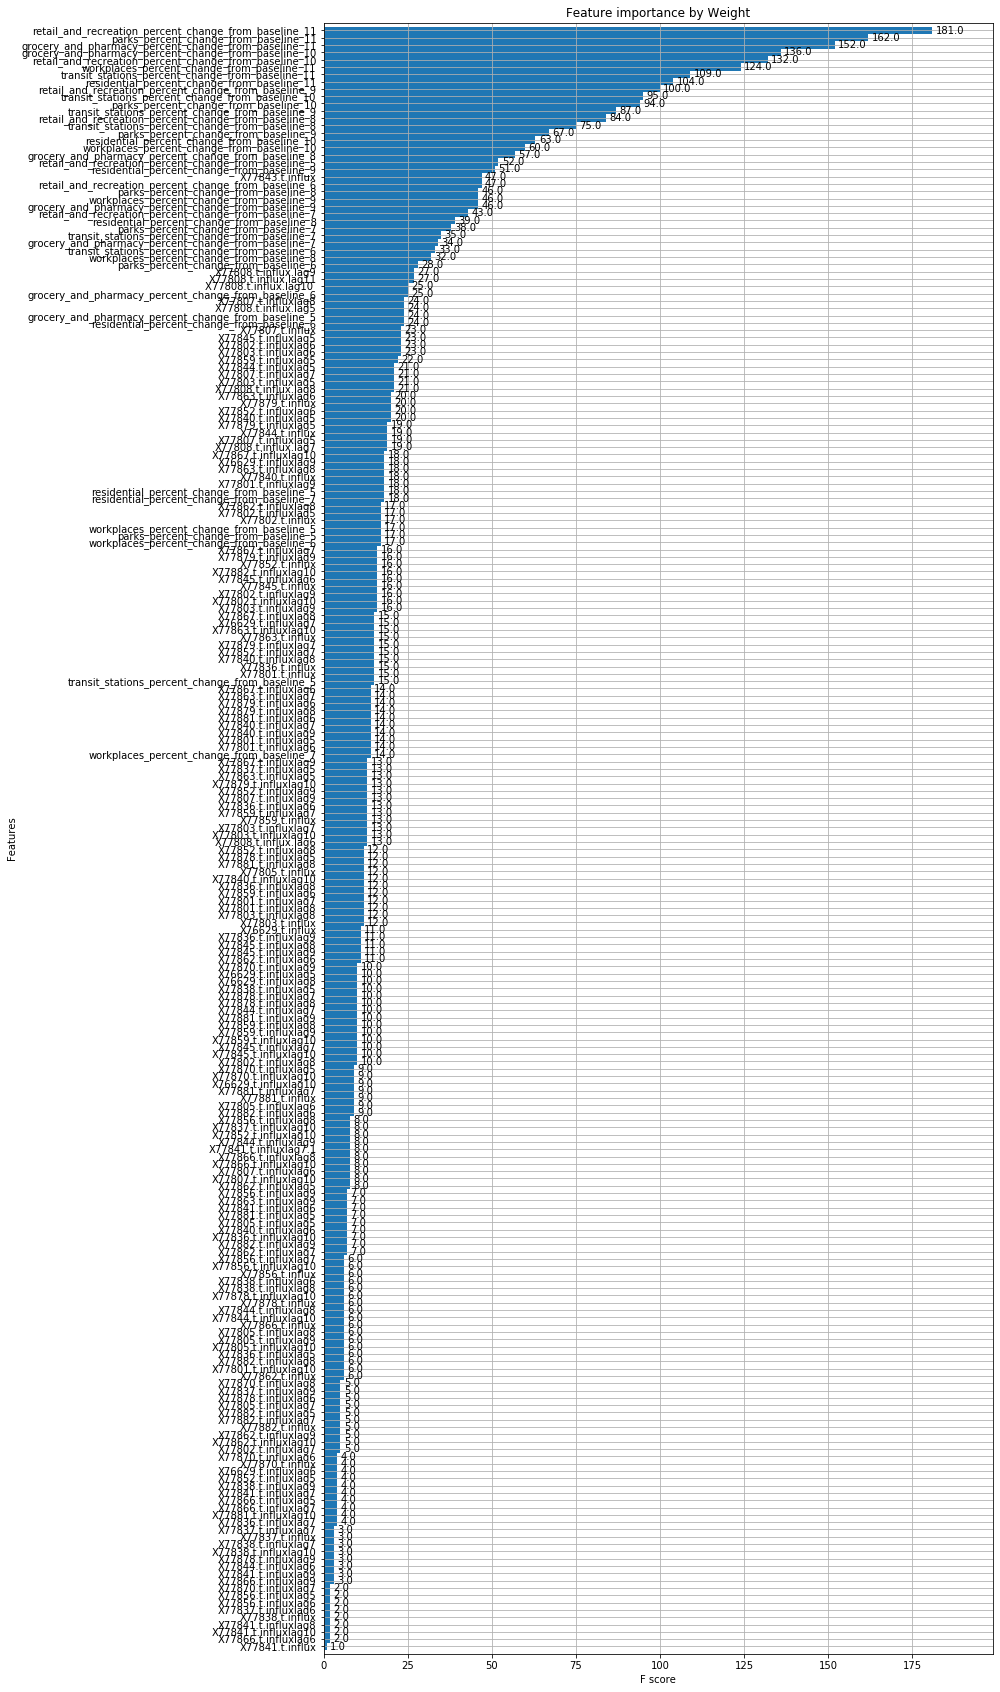

In [218]:
fig, ax = pl.subplots(figsize=(12,30))
xgb.plot_importance(loadedModel, height=1, ax=ax)
pl.title("Feature importance by Weight")
pl.show()

#### Results for Dataset

Root Mean Squared Error (RMSE),
Mean Squared Error (MSE),
Mean Absolute Error (MAE)

In [219]:
# Test predictions
preds = loadedModel.predict(X_df)

# Calculate Test RMSE 
# Currently it's stuck at around 26, which is about 400-600 MSE
rmse = np.sqrt(mean_squared_error(y_df, preds))
print("Test RMSE: %f" % (rmse))

mse = mean_squared_error(y_df, preds)
print("Test MSE: %f" % (mse))

mae = mean_absolute_error(y_df, preds)
print('Test MAE: %f' % (mae))

Test RMSE: 8.669740
Test MSE: 75.164398
Test MAE: 3.271394


# Build Model

## XGBoost (Tree)

### The default tree method for XGBoost

#### Packages Used

In [173]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
from matplotlib.pyplot import figure
import joblib

#### Make Dataframe

In [174]:
# Make dataframe from data
df = pd.read_csv("trainDataXGBoost.csv")
# Make sure everything in dataframe is numeric (get rid of $)
df = df.apply(pd.to_numeric, errors='coerce')

#### Split Dataframe into training and test (8 to 2)

In [189]:
# Split dataframe into training and testing dataframes
train, test = train_test_split(df, test_size=0.2)
y_train = train.iloc[:, 0]
X_train = train.iloc[:, 1:]
y_rem = test.iloc[:, 0]
X_rem = test.iloc[:, 1:]

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)



# Create D Matrix for XGB
data_dmatrix = xgb.DMatrix(data=df.iloc[:, 1:],label=df.iloc[:, 0])

#### Create XGB Model and fit it

In [190]:
# Create XGB model
# We may need to tune the hyperparameters some more here
xg_reg = xgb.XGBRegressor()

# Fit XGB model
#xg_reg.fit(X_train,y_train)

#### Hyperparameter tuning with RandomSearchCV

In [202]:
# HP Grid
hyperparameter_grid = {
    'max_depth': [4, 5, 7, 10, 20],
    'subsample': [0, 0.2, 0.3, 0.5, 1.0],
    'colsample_bytree': [0.2, 0.3, 0.5, 0.7, 1.0],
    'colsample_bylevel': [0.2, 0.3, 0.5, 0.7, 1.0],
    'n_estimators': [50, 100, 300, 600, 1000],
    'min_child_weight': [0.0, 0.5, 1.0, 3.0, 10.0],
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
    'gamma': [0, 0.2, 0.3, 0.5, 1.0]
    }


rsCV = RandomizedSearchCV(estimator=xg_reg,
            param_distributions=hyperparameter_grid,
            cv=5, 
            n_iter=20,
            n_jobs = -1,
            scoring = 'neg_mean_absolute_error',
            verbose = 5, 
            return_train_score = True,
            random_state=42)

rsCV.fit(X_train,y_train, early_stopping_rounds = 25, eval_set = [(X_valid, y_valid)], verbose=True)

xg_reg = rsCV.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  98 out of 100 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.4s finished
C:\Users\Daniel Bang\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0]	validation_0-rmse:108.91779
[1]	validation_0-rmse:107.95560
[2]	validation_0-rmse:106.74454
[3]	validation_0-rmse:105.58505
[4]	validation_0-rmse:103.98242
[5]	validation_0-rmse:103.13112
[6]	validation_0-rmse:101.69994
[7]	validation_0-rmse:100.61878
[8]	validation_0-rmse:99.62515
[9]	validation_0-rmse:98.57565
[10]	validation_0-rmse:97.10035
[11]	validation_0-rmse:96.12020
[12]	validation_0-rmse:94.54027
[13]	validation_0-rmse:93.22702
[14]	validation_0-rmse:92.33970
[15]	validation_0-rmse:91.46787
[16]	validation_0-rmse:90.37607
[17]	validation_0-rmse:89.45047
[18]	validation_0-rmse:88.27774
[19]	validation_0-rmse:87.38841
[20]	validation_0-rmse:86.70133
[21]	validation_0-rmse:85.46105
[22]	validation_0-rmse:84.62938
[23]	validation_0-rmse:83.99882
[24]	validation_0-rmse:83.12056
[25]	validation_0-rmse:81.84762
[26]	validation_0-rmse:81.11377
[27]	validation_0-rmse:80.32797
[28]	validation_0-rmse:79.11478
[29]	validation_0-rmse:78.34666
[30]	validation_0-rmse:77.20929
[31]	valid

C:\Users\Daniel Bang\Anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[34]	validation_0-rmse:74.10648
[35]	validation_0-rmse:73.01833
[36]	validation_0-rmse:72.65521
[37]	validation_0-rmse:71.77831
[38]	validation_0-rmse:71.41621
[39]	validation_0-rmse:70.89716
[40]	validation_0-rmse:70.15749
[41]	validation_0-rmse:69.26558
[42]	validation_0-rmse:68.64559
[43]	validation_0-rmse:67.90985
[44]	validation_0-rmse:67.36724
[45]	validation_0-rmse:66.79932
[46]	validation_0-rmse:66.02863
[47]	validation_0-rmse:65.51627
[48]	validation_0-rmse:64.78126
[49]	validation_0-rmse:63.85251
[50]	validation_0-rmse:63.56599
[51]	validation_0-rmse:62.79415
[52]	validation_0-rmse:62.55158
[53]	validation_0-rmse:61.84603
[54]	validation_0-rmse:61.58272
[55]	validation_0-rmse:61.23848
[56]	validation_0-rmse:60.50002
[57]	validation_0-rmse:59.80250
[58]	validation_0-rmse:59.43611
[59]	validation_0-rmse:58.80034
[60]	validation_0-rmse:58.19765
[61]	validation_0-rmse:57.61312
[62]	validation_0-rmse:57.18145
[63]	validation_0-rmse:56.77573
[64]	validation_0-rmse:56.14988
[65]	val

In [203]:
xg_reg

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.3, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=0.0,
             missing=nan, monotone_constraints='()', n_estimators=600, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

#### Plot weights of coefficients

Top 20 Coefficient Values

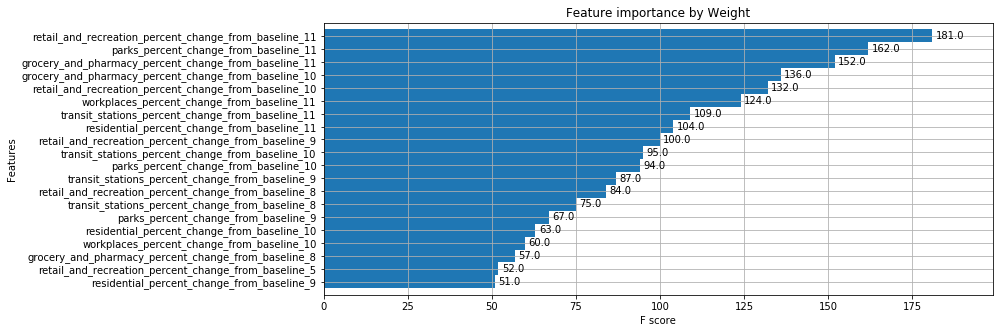

In [204]:
fig, ax = pl.subplots(figsize=(12,5)) # figure size
xgb.plot_importance(xg_reg, max_num_features=20, height=1, ax=ax) # top 20 features
pl.title("Feature importance by Weight")
pl.show()

Top 100 features

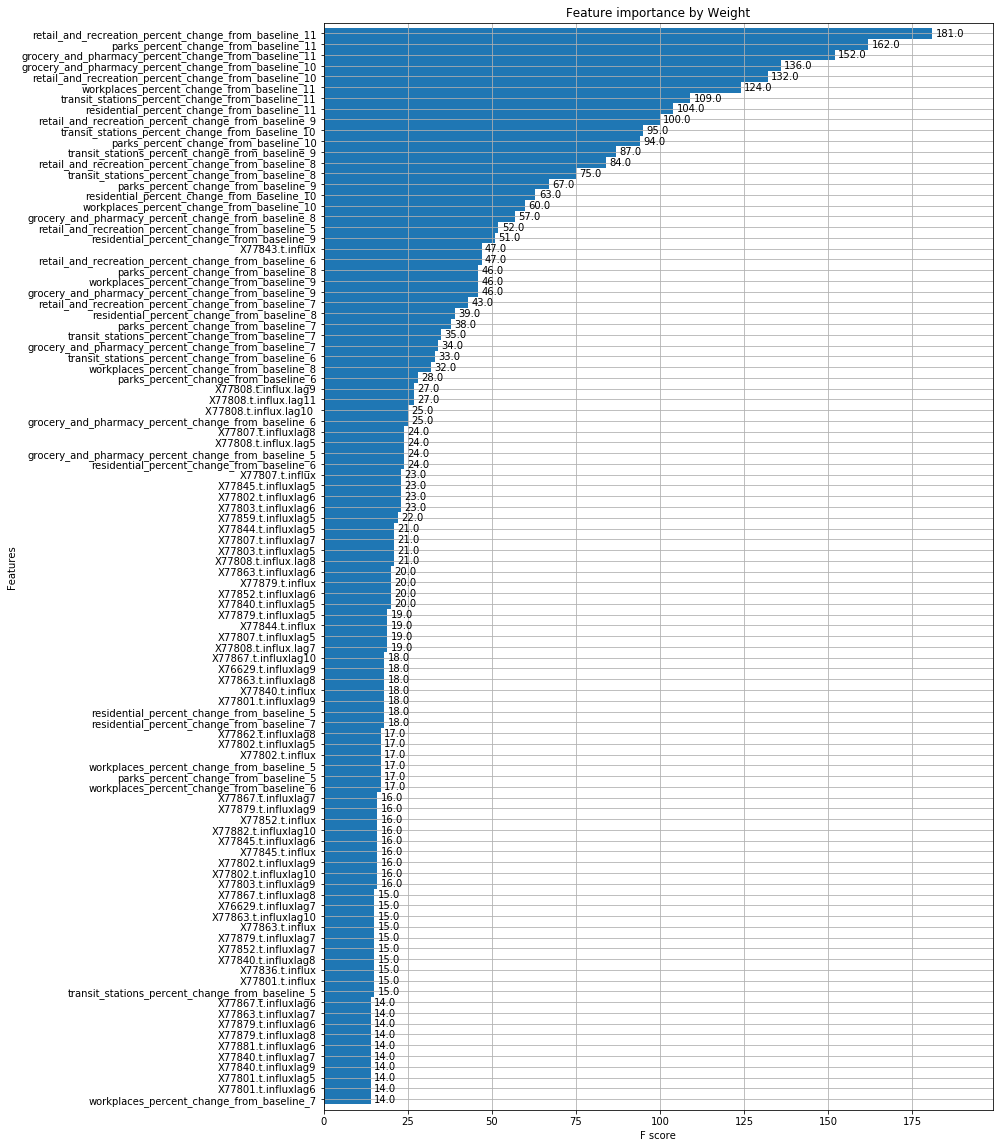

In [205]:
fig, ax = pl.subplots(figsize=(12,20))
xgb.plot_importance(xg_reg, max_num_features=100, height=1, ax=ax)
pl.title("Feature importance by Weight")
pl.show()

#### Results for Training and Testing

Root Mean Squared Error (RMSE),
Mean Squared Error (MSE),
Mean Absolute Error (MAE)

In [206]:
# Train predictions
trainPreds = xg_reg.predict(X_train)

# Test predictions
preds = xg_reg.predict(X_test)

# Train prediction
trainRmse = np.sqrt(mean_squared_error(y_train, trainPreds))
print("Train RMSE: %f" % (trainRmse))

trainMse = mean_squared_error(y_train, trainPreds)
print("Train MSE: %f" % (trainMse))

trainMae = mean_absolute_error(y_train, trainPreds)
print('Train MAE: %f' % (trainMae))


# Calculate Test RMSE 
# Currently it's stuck at around 26, which is about 400-600 MSE
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("Test RMSE: %f" % (rmse))

mse = mean_squared_error(y_test, preds)
print("Test MSE: %f" % (mse))

mae = mean_absolute_error(y_test, preds)
print('Test MAE: %f' % (mae))

Train RMSE: 0.796807
Train MSE: 0.634901
Train MAE: 0.438559
Test RMSE: 14.453452
Test MSE: 208.902277
Test MAE: 9.713160


#### Save Model

In [207]:
# Save model as pickle file
joblib.dump(xg_reg, 'xgboostModelv2.pkl')


['xgboostModel.pkl']